# ICD9 Diabetes Code Occurrences


The goal of this notebook is to find the occurrences for diabetes related codes (both diabetes and prediabetes code).

Results: each code and the number of occurrences was found. This can be used in the socail network to find related diagnoses. Additionally it hints towards whether using a certain code is practical in a model. 

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import txt files that contain library of icd codes and associated number of occurances, this file was generated from Plot_ICD9_Occurances.py

In [2]:
    with open("icd_occurrences.txt") as f:
        ICD_lib = json.load(f)

    with open("icd_V_occurrences.txt") as f:
        ICD_V_lib = json.load(f)

Create a list of diabetes related codes and search for their total occurences. These codes are taken from Common ICD Relating to Diabetes Word file. Descriptions are taken from D_ICD_DIAGNOSES.csv file.

In [3]:
diabetes_codes = ["250.0", "250.02","250.1","250.12","250.2","250.22",
                  "250.3","250.32","250.4","250.42","250.5","250.52",
                  "250.6","250.62","250.7","250.72","250.8","250.82",
                  "250.9","250.92", "790.22", "278.01", "278.0",
                  ]
diabetes_V_codes = ["85.30","85.31","85.32","85.33","85.34",
                    "85.35","85.36","85.37","85.38","85.39","85.41",
                    "85.42","85.43","85.44","85.45"]
icd_codes = []
num_codes = []


In [4]:
for code in diabetes_codes:    
    for key,val in ICD_lib.items():
        if(code == str(key)):
            icd_codes.append(key)
            num_codes.append(val)
            
for code in diabetes_V_codes:
    for key,val in ICD_V_lib.items():   
        if(code == str(key)):
            icd_codes.append("V" + str(key))
            num_codes.append(val)

        
    

In [5]:
ICD_DEF = pd.read_csv("D_ICD_DIAGNOSES.csv")

code_search = ["250.00", "250.02","250.10","250.12","250.20","250.22",
            "250.30","250.32","250.40","250.42","250.50","250.52",
            "250.60","250.62","250.70","250.72","250.80","250.82",
            "250.90","250.92", "790.22", "278.01", "278.00",
            "V85.31","V85.32","V85.33","V85.34",
            "V85.35","V85.36","V85.37","V85.38","V85.39","V85.41",
            "V85.42","V85.43","V85.44","V85.45"]
    
i=0
for code in code_search:
    code_search[i] = code.replace(".","")
    i += 1
    

In [6]:
codes_description = []

for code in code_search:
    for index,row in ICD_DEF.iterrows():  
        if(code == str(row["ICD9_CODE"])):
            codes_description.append(row["LONG_TITLE"])

Plotting the above information in a var graph will give a quick visualization on which icd codes are commonly used and vice versa.

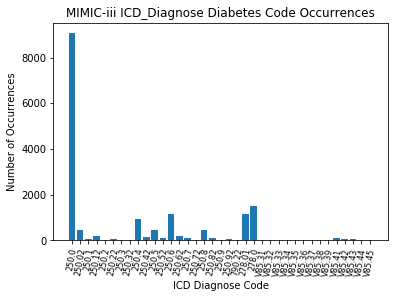

In [7]:
    index = np.arange(len(icd_codes))
    plt.bar(index, num_codes)
    plt.xlabel('ICD Diagnose Code', fontsize=10)
    plt.ylabel('Number of Occurrences', fontsize=10)
    plt.xticks(index, icd_codes, fontsize=8, rotation=80)
    plt.title('MIMIC-iii ICD_Diagnose Diabetes Code Occurrences')
    plt.show()

The table below shows the specific count along with each code description, to better understand the graph above. It should be noted that each diagnosis of diabetes in the table is assumed to be type II. 

In [8]:
table_form = [icd_codes,num_codes,codes_description]
print(np.transpose(table_form))
print(len(icd_codes),len(codes_description))


[['250.0' '9058'
  'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled']
 ['250.02' '454'
  'Diabetes mellitus without mention of complication, type II or unspecified type, uncontrolled']
 ['250.1' '48'
  'Diabetes with ketoacidosis, type II or unspecified type, not stated as uncontrolled']
 ['250.12' '201'
  'Diabetes with ketoacidosis, type II or unspecified type, uncontrolled']
 ['250.2' '32'
  'Diabetes with hyperosmolarity, type II or unspecified type, not stated as uncontrolled']
 ['250.22' '44'
  'Diabetes with hyperosmolarity, type II or unspecified type, uncontrolled']
 ['250.3' '10'
  'Diabetes with other coma, type II or unspecified type, not stated as uncontrolled']
 ['250.32' '5'
  'Diabetes with other coma, type II or unspecified type, uncontrolled']
 ['250.4' '954'
  'Diabetes with renal manifestations, type II or unspecified type, not stated as uncontrolled']
 ['250.42' '130'
  'Diabetes with renal manifestations, 

From the table it is seen which icd9 diabetes related codes are more common occurrences. Some codes relative to the data size are hardly used, such as 790.22 - Imparied glucose tolerance test. Other are used often, such as obesity (both 278.01 and 278.00) along with 250.00 (general diabetes) and some associated varaitions. Using this information, it makes creating a model for diabetes prediction better, since the potential for specifying the type of diabetes is possible. Yet, trying to model something with only 6 occurrances may potentially not be reliable/significant enough.